## Homework II: Logistic Regression, SVM and some computational drug design

__Given date:__ Saturday March 7 

__Due date:__ Friday March 20

__Total__ : 30 pts + Bonus (One of the bonus question is on 3pts. For the other, it depends on what you can do)

<img src="computationalDrugDiscovery.png" width="400">

### Exercise I.1. Logistic regression (10pts)

Use the lines below to load the variables __HW2_ExI_X__ and __HW2_ExI_Y__. In this first exercise, you will learn a logistic regression classifier on this dataset. Recall that the logistig regression model takes the form

$$p(t=1|\mathbf{x}) = \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})$$

where $\tilde{\mathbf{x}} = [1, \mathbf{x}] = [1, x_1, x_2, \ldots, x_D]$. Consequently, we thus have 

$$p(t = 0|\mathbf{x}) = 1 - \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})$$

we can then write the total probability that a point $\mathbf{x}$ will be from class $c = \left\{0,1\right\}$ as 

$$p(t = c|\mathbf{x}) = p(t = 1|\mathbf{x})^{c} p(t = 0|\mathbf{x})^{1-c} $$

or equivalently

$$p(t = c|\mathbf{x}) = (\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}))^{c} (1-\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}))^{1-c}  = p^c (1-p)^{1-c}$$

which is a binomial distribution with probability of success $\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})$. If we assume that all the samples are independent, the probability of observing the dataset can read as the product

$$p(\left\{\mathbf{x}_i, t_i\right\}) = \prod_{i=1}^N p(t = t(\mathbf{x}_i)|\mathbf{x}_i)\quad  (*)$$

We can then try to learn the parameters $\mathbf{\beta}$ that maximize this probability (i.e such that the probability $p(t = t_i |\mathbf{x}_i)$ is high for every sample pair in the dataset. To do this, we take the negative logarithm of $(*)$ which gives 

$$-\log \prod_{i=1}^N p(t = t(\mathbf{x}_i)|\mathbf{x}_i) = -\sum_{i=1}^N c_i \log(\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}_i)) - \sum_{i=1}^N (1-c_i)\log(1-\sigma(\mathbf{\beta}^T\tilde{\mathbf{x}_i}))\quad  (**)$$

and find the $\mathbf{\beta}$ that minimizes this expression.

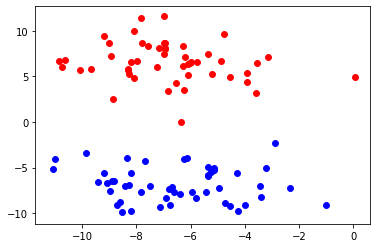

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


X1 = np.load('Ex1_HW2_X.npy')
Y1 = np.load('Ex1_HW2_t.npy') 

X_class1 = X1[Y1==0,:]
X_class2 = X1[Y1==1,:]

plt.scatter(X_class1[:, 0], X_class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(X_class2[:, 0], X_class2[:, 1], marker='o', c='b',
            s=35)

plt.show()


__Question I.1.1 Logistic from scratch (7pts)__ Write a function that takes as inputs a set of training pairs $\left\{\mathbf{x}_i, t_i\right\}$ such as those stored in the variables $\texttt{HW2_ExI_X}$ and $\texttt{HW2_ExI_Y}$, and return the logistic regression classifier by learning it through gradient descent from the minimization of the negative log likelihood function $(**)$. Apply your function to the dataset given above and plot the discriminant function on top of this dataset.


In [2]:
# start by coding the sigmoid function. 

def sigmoid(x):
    
    '''The function should return sigma(x) = 1/(1+e^-x) at the point x'''
    sigma = 1 / (1 + np.exp(-x))
    
    return sigma
    

def LogisticRegression(X, y):
    beta = np.zeros(X.shape[1])
        
    for i in range(10000):
        z = np.dot(X, beta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        beta -= gradient
    return beta

optimal_beta = LogisticRegression(X1, Y1)
predictions = np.round(sigmoid(X1 @ optimal_beta))

# accuracy
acc = (predictions == Y1).mean()
acc

1.0

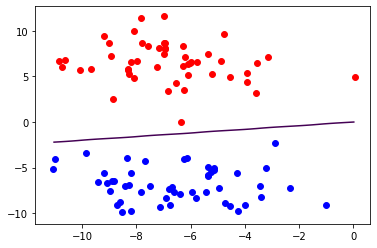

In [3]:
# Line plotting
x1_min, x1_max = X1[:,0].min(), X1[:,0].max(),
x2_min, x2_max = X1[:,1].min(), X1[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

plt.scatter(X_class1[:, 0], X_class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(X_class2[:, 0], X_class2[:, 1], marker='o', c='b',
            s=35)
grid = np.c_[xx1.ravel(), xx2.ravel()]
probabilities = sigmoid(grid @ optimal_beta).reshape(xx1.shape)
plt.contour(xx1, xx2, probabilities, [0.5])
plt.show()


__Question I.1.2 Logistic vs OLS (3pts)__ Consider the dataset given below. On this dataset, __using the corresponding modules from scikit__, learn a linear regression classifier. Then learn a logistic classifier. How do the two approaches compare with each other? Display each each of the classifiers using 'meshgrid + contourf'

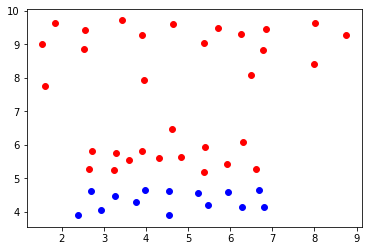

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from sklearn.datasets import make_classification

data_class1 = sio.loadmat('XHW2_EX2_Class1.mat')['XHW2_EX2_Class1']
data_class2 = sio.loadmat('XHW2_EX2_Class2.mat')['XHW2_EX2_Class2']


plt.scatter(data_class1[:, 0], data_class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(data_class2[:, 0], data_class2[:, 1], marker='o', c='b',
            s=35)

plt.show()

In [8]:
from sklearn import linear_model
y1 = np.zeros(data_class1.shape[0])
y2 = np.ones(data_class2.shape[0])

In [9]:
X = np.append(data_class1, data_class2, axis = 0)
y = np.append(y1, y2)

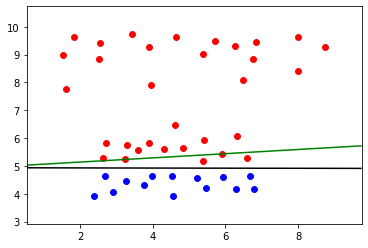

In [10]:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)


ols = linear_model.LinearRegression()
ols.fit(X, y)

# Line plotting
x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1,
x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1,
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

plt.scatter(data_class1[:, 0], data_class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(data_class2[:, 0], data_class2[:, 1], marker='o', c='b',
            s=35)

probaLogistic = clf.predict_proba(X)

grid = np.c_[xx1.ravel(), xx2.ravel()]
probabilities = clf.predict_proba(grid)[:,0].reshape(xx1.shape)

proba_ols = ols.predict(grid).reshape(xx1.shape)

plt.contour(xx1, xx2, probabilities, [0.5], colors="black")
plt.contour(xx1, xx2, proba_ols, [0.5], colors="green")

plt.show()
# LogisticRegression classifies better

So far we have studided Maximal Margin classifier when the data was linearly separable. In this case, the plane will naturally position itself in between the two classes. The formulation in the linearly separable case is of the form

$$\max_{\mathbf{w}, b_0}\min_{i} \frac{y(\mathbf{x}^{(i)})t^{(i)}}{\|\mathbf{w}\|} = \max_{\mathbf{w}, b_0}\min_i \frac{(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)t^{(i)}}{\|\mathbf{w}\|}$$

This formulation is not very nice because the optimization variable appears at the denominator. Note that the formulation $(*)$ can be written as 

\begin{align}
\max_{\gamma, \mathbf{w}, b_0} & \quad \frac{\gamma}{\|\mathbf{w}\|} \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq \gamma 
\end{align}

Here we simply introduce the parameter $\gamma$ to represent the margin (smallest distance between any point from the dataset and the plane). An important thing to notice when looking at $(**)$ is that any solution for $\mathbf{w}, b_0, \gamma$ can generate an other solution with the same objective by simply scaling it with a positive weight $\alpha$. Indeed if $\mathbf{w},b_0, \gamma$ is an optimal solution to $(**)$, it is easy to check that $\alpha \mathbf{w}, \alpha \gamma, \alpha b_0$ will be a valid solution as well. Since we only need one solution, we can choose to optimize over the set of solution such that $\gamma = 1$. Concretely this means that for each 'line' of solution $(\alpha \gamma, \alpha b_0, \alpha \mathbf{w})$, we only retain the $\alpha$ corresponding to $\alpha\gamma = 1$. The problem then becomes

\begin{align}
\max_{\mathbf{w}, b_0} & \quad \frac{1}{\|\mathbf{w}\|} \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1.
\end{align}

To get the final formulation, note that the maximum value for $1/\|\mathbf{w}\|$ is achieved when $\|\mathbf{w}\|$ is the smallest. We an thus solve the problem

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\| \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1., \quad\quad (***) 
\end{align}



So far we have assumed that the dataset was linearly separable. In this case, all the points will satisfy $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$. Sometimes, however, we could be in a situation where the dataset is not linearly separable and there are points which will be misclassified so that $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$ might be negative. To account for such situation, we will consider slack variables $\xi_i$ and use a more general formulation of the form

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\| + C\sum_{i} \xi_i \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1 - \xi_i., \quad\quad (***) 
\end{align}

It is in fact possible to write formulation $(***)$ as an unconstrained optimization problem. Recall that we decided to set the minimum margin to $1$. This in particular means that all the points that are correctly classified should satisfy $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$. The approach encoded in $(***)$ corresponds to penalazing those points for which $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)<1$. As soon as we have a positive value for one of the variables 


#### Question II.1 Hinge Loss (3pts)

We consider the hinge loss $\ell(x, y) = \max(0, 1-x\cdot y)$ for $x = t^{(i)}$ and $y = (\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$. Note that if $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 0$ (meaning the pair $\left\{\mathbf{x}^{(i)}\right\}$ is correctly classified), the output of the hinge function is $0$. On the other hand, if $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)<0$ (which corresponds to a pair that is incorrectly classified, as can occur when the data is not linearly separable), then the cost is $1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$ (i.e. we can think of this cost as by how much we violate the constraint $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$).  From this, we can now write the objective as

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\|^2 + C\sum_{i} \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))
\end{align}

Instead of weighting the constraints, we can weight the first term. This gives a similar formulation of the form

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \frac{1}{N}\sum_{i=1}^{N} \left\{\frac{\lambda}{2} \|\mathbf{w}\|^2 + \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))\right\}\quad (****)
\end{align}

The PEGASOS algorithm finds the corresponding Soft Margin classifier by applying batch gradient descent to this last objective. 

What is the gradient of the Hinge loss?

In [11]:
def hingLoss(X, t):
    '''Answer the question above by '''
    loss = 1 - X * t
    loss = [(i > 0) * i for i in loss]
    return loss

#### Question II.2 Maximum Margin Classifier from scratch (7pts)

Using your answer to question II.2.1 above, implement the PEGASOS algorithm. Use a simple batch gradient descent approach with a sufficiently small learning rate (let us say $\eta = 1e-4$). Update the lambda as $1/t$ where $t$ is the step counter. 

In [141]:
# I will use tqdm to have a nice loader
from tqdm import tqdm
import random

In [184]:
def approximatePEGASOS(X, t, lambda0, eta):
    
    '''The function takes as input a set of sample pairs {x^{(i)}, t_^{(i)}} as well as an initial value for b0 
    and a value for the learning rate eta. It should return the weight vector w and the bias b0 
    for the Max Margin Classifier'''
    w = np.zeros(X.shape[1])
    epoch = 1
    
    for e in range(eta):
        points = list(range(X.shape[0]))
        random.shuffle(points)
        for point in points:
            learning_rate = 0.0000000001
            loss = hingLoss(X[point] * w, t[point])
            w = (1 - learning_rate * lambda0) * w
            w -= learning_rate * loss[0]
            epoch += 1

    return w

Apply the algorithm to the dataset below

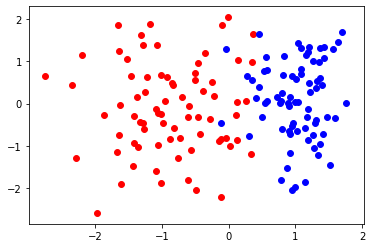

In [185]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X = np.load('Ex2_HW2_X.npy') 
Y = np.load('Ex2_HW2_t.npy') 

XEx2_Class1 = X[Y==0,:]
XEx2_Class2 = X[Y==1,:]

plt.scatter(XEx2_Class1[:, 0], XEx2_Class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(XEx2_Class2[:, 0], XEx2_Class2[:, 1], marker='o', c='b',
            s=35)

weights = approximatePEGASOS(X, Y, 0.0000001, 100)

In [198]:
y_pred = X @ weights
predictions = np.round([(i > 0) * i for i in -1 * np.sign(y_pred)])
# accuracy
acc = (predictions == Y).mean()
acc

0.8333333333333334

#### Bonus II.3. dynamic learning rate. (3pts) 
The exact PEGASOS algorithm updates the learning rate dynamically as $\eta_t = \lambda \cdot  t$ for some particular choice of $\lambda$ and where $t$ denotes the step counter. Modify the approximate version of the PEGASOS algorithm that you derived in question II.2.2 to make it work with such a dynamical learning rate. 

In [199]:
def PEGASOS(X, t, lambdaPG, eta):
    
    '''The function takes as input a set of sample pairs {x^{(i)}, t_^{(i)}} as well as an initial value for b0 
    and a value for the learning rate eta. It should return the weight vector w and the bias b0 
    for the Max Margin Classifier'''
    w = np.zeros(X.shape[1])
    epoch = 1
    
    for e in range(eta):
        points = list(range(X.shape[0]))
        random.shuffle(points)
        for point in points:
            learning_rate = lambdaPG * epoch # +1 to prevent division by zero
            loss = hingLoss(X[point] * w, t[point])
            w = (1 - learning_rate * lambdaPG) * w
            w -= learning_rate * loss[0]
            epoch += 1

    return w

In [205]:
weights = PEGASOS(X, Y, 0.00001, 100)
y_pred = X @ weights
predictions = np.round([(i > 0) * i for i in -1 * np.sign(y_pred)])
# accuracy
acc = (predictions == Y).mean()
acc

0.8333333333333334

### Exercise III: Computational drug design: Part I, Training on Thrombin (10pts)

With the recent spreading of the COVID-19 "Corona" Virus. Many initiatives relying on Machine Learning, have been taken to find new drugs that would be able to prevent the virus from infecting host cells. The Human Angiotensin-Converting Enzyme 2 (ACE2) has been proved by many studies to be the specific receptor for the Spike RBD of SARS-CoV. A common approach (followed for example for researchers at Oak Ridge National Laboratory) is to design compounds (such as the one shown in gray in the figure above) that would be able to bind to the SARS-CoV-2 spike protein (shown in cyan), thus making the virus unable to dock to the human ACE2 receptors (shown in purple in the figure below). 


<img src="corona.png" alt="Drawing" style="width: 400px;"/>

Source: [Physics.org](https://phys.org/news/2020-03-early-drug-compounds-supercomputing-combat.html)

We do not have enough data on the COVID-19 yet so we are going to train on an older computational drug design dataset from NIPS 2003. The general idea is the same. A Drug is a small organic molecule that can achieve its desired activity by binding to a target site on a receptor. The first step in the discovery of a new drug is usually to identify and isolate the receptor to which it should bind, followed by testing many small molecules for their ability to bind to the target site (see the [UCI ML Repo](https://archive.ics.uci.edu/ml/datasets/Dorothea) for more details). For this particular dataset, we are interested in checking which compounds can or cannot bind to thrombin. 

#### Question III.1 (4pts)
Start by downloading the DOROTHEA dataset on the [UCI ML website ](https://archive.ics.uci.edu/ml/datasets/Dorothea). Once you have downloaded the data, as we did for face recognition, use the PCA module from scikit-learn to reduce the dimension of your feature vectors from their initial size (100000) to about 100. Split the data into a training and test part using the train_test_split module from scikit learn  

In [216]:
# read the data file
f = open("./DOROTHEA/dorothea_train.data")
X_train = np.zeros((800, 100000))
row = 0
for line in f:
    for token in line.split():
        idx = int(token)
        X_train[row, idx-1] = 1
    row += 1

f.close()

f = open("./DOROTHEA/dorothea_train.labels")
y_train = np.zeros(800)
i = 0
for line in f:
    digit = float(line.strip())
    y_train[i] = digit
    i += 1

f.close()

# read the data file
f = open("./DOROTHEA/dorothea_valid.data")
X_test = np.zeros((800, 100000))
row = 0
for line in f:
    for token in line.split():
        idx = int(token)
        X_test[row, idx-1] = 1
    row += 1

f.close()

f = open("./DOROTHEA/dorothea_valid.labels")
y_test = np.zeros(800)
i = 0
for line in f:
    digit = float(line.strip())
    y_test[i] = digit
    i += 1

f.close()

In [220]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# Use the PCA module to reduce compress the feature vectors

pca = PCA(n_components=100)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)



In [221]:
X_train.shape

(800, 100)

 #### Question III.2 (6pts)

Once you have learned the compressed representation for your samples, learn the following two classifiers

- SVC with RBF kernel (Combine the SVC with GridSearchCVto determine the optimal values for $C$ (how much you penalize misclassification) and $\gamma$ (width of kernel)). To start you can take your grid to be defined as below

param_grid = {'C': [1e2, 5e2, 1e3, 1e4, 5e4],
              'gamma': [0.0005, 0.001, 0.005, 0.01, 0.1], }

Keep in mind that larger $\gamma$ means smaller kernel. I.e. $K(x, y) = exp(-gamma ||x-y||^2)$. $C$ is defined as in exercise II. 

- Logistic regression classifier 

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC

param_grid = {'C': [1e2, 5e2, 1e3, 1e4, 5e4], 'gamma': [0.0005, 0.001, 0.005, 0.01, 0.1], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

y_predict = grid.predict(X_test)

# put your code here


/Users/macbook/Library/Python/3.6/lib/python/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=100.0, gamma=0.0005, kernel=rbf ...............................
[CV] ................ C=100.0, gamma=0.0005, kernel=rbf, total=   0.2s
[CV] C=100.0, gamma=0.0005, kernel=rbf ...............................
[CV] ................ C=100.0, gamma=0.0005, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=0.0005, kernel=rbf ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................ C=100.0, gamma=0.0005, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=0.001, kernel=rbf ................................
[CV] ................. C=100.0, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=0.001, kernel=rbf ................................
[CV] ................. C=100.0, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100.0, gamma=0.001, kernel=rbf ................................
[CV] ................. C=100.0, gamma=0.001, kernel=rbf, total=   0.4s
[CV] C=100.0, gamma=0.005, kernel=rbf ................................
[CV] ................. C=100.0, gamma=0.005, kernel=rbf, total=   0.5s
[CV] C=100.0, gamma=0.005, kernel=rbf ................................
[CV] ................. C=100.0, gamma=0.005, kernel=rbf, total=   0.2s
[CV] C=100.0, gamma=0.005, kernel=rbf ................................
[CV] ................. C=100.0, gamma=0.005, kernel=rbf, total=   0.4s
[CV] C=100.0, gamma=0.01, kernel=rbf .................................
[CV] .

[CV] .............. C=50000.0, gamma=0.0005, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.001, kernel=rbf ..............................
[CV] ............... C=50000.0, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.001, kernel=rbf ..............................
[CV] ............... C=50000.0, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.001, kernel=rbf ..............................
[CV] ............... C=50000.0, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.005, kernel=rbf ..............................
[CV] ............... C=50000.0, gamma=0.005, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.005, kernel=rbf ..............................
[CV] ............... C=50000.0, gamma=0.005, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.005, kernel=rbf ..............................
[CV] ............... C=50000.0, gamma=0.005, kernel=rbf, total=   0.1s
[CV] C=50000.0, gamma=0.01, kernel=rbf ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   22.5s finished


In [224]:
acc = (y_predict == y_test).mean()
acc

0.3925

In [227]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

acc = (y_predict == y_test).mean()
acc

/Users/macbook/Library/Python/3.6/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.3875

### Bonus : Computational drug design. Part II: Tackling COVID-19

Now that you understand the basic idea behind computational drug design, we are ready to try to tackle the real challenge. A couple of days ago, Sage Health started a competition which was aimed at developing new drugs to fight corona virus. The competition, which was [advertised through youtube](https://www.youtube.com/watch?v=1LJgkovowgA), is now closed. However it would be interesting to see whether anybody could make additional discoveries from the data. Check the competition video and try to implement some of the step, using the data from the github pages of the winners (see here for the main [SageHealth webpage](https://www.sage-health.org/) and [https://www.sage-health.org/coronavirus/](here for the links to each of the winners github pages)) 

Points for this question depends on how far you can go. 